In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
# import data file to a dataframe
econ_data = pd.read_csv('economicdata2016-2016.csv',low_memory=False)

In [3]:
econ_data.head(15)

,Year,ISO_Code,Countries,SUMMARY INDEX,Quartile,Government Consumption,1A data,Transfers and subsidies,1B data,Government enterprises and investment,...,Conscription,Labor market regulations,Administrative requirements,Bureaucracy costs,Starting a business,Extra payments/bribes/favoritism,Licensing restrictions,Tax compliance,Business regulations,Regulation
0,2016,AGO,Angola,5.17,4,7.60,14.16,8.89,4.59,0.0,...,0,4.56,2.76,1.33,8.66,1.95,8.10,6.78,4.93,5.52
1,2016,ALB,Albania,7.54,1,8.23,12.01,7.51,9.64,8.0,...,10,6.92,6.07,6.00,9.71,4.05,7.32,7.07,6.71,6.91
2,2016,ARE,Unit. Arab Em.,7.50,1,6.07,19.35,8.82,4.84,2.0,...,0,6.96,7.25,5.78,9.59,8.47,10.00,9.87,8.49,7.38
3,2016,ARG,Argentina,4.84,4,5.34,21.86,6.05,15.00,6.0,...,10,5.15,2.40,6.67,9.12,3.26,5.25,6.51,5.54,5.37
4,2016,ARM,Armenia,7.57,1,7.26,15.30,7.75,8.76,8.0,...,0,6.23,4.55,6.00,9.85,4.58,9.32,6.49,6.80,7.38
5,2016,AUS,Australia,7.98,1,4.51,24.66,6.66,12.74,10.0,...,10,7.70,3.81,10.00,9.91,7.24,8.94,8.82,8.12,8.47
6,2016,AUT,Austria,7.58,1,3.74,27.27,3.10,25.82,10.0,...,3,5.57,4.15,8.89,9.23,6.42,7.30,8.53,7.42,7.37
7,2016,AZE,Azerbaijan,6.49,3,6.32,18.51,7.88,8.28,0.0,...,1,6.08,6.07,6.44,9.84,5.35,6.96,7.81,7.08,6.87
8,2016,BDI,Burundi,5.92,4,5.96,19.73,10.00,0.47,2.0,...,10,7.80,3.43,2.67,9.52,3.30,9.76,7.40,6.01,6.27
9,2016,BEL,Belgium,7.32,2,2.49,31.53,2.01,29.82,10.0,...,10,7.33,3.42,8.67,9.76,6.47,7.46,8.48,7.37,8.10


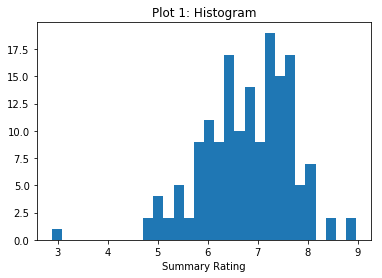

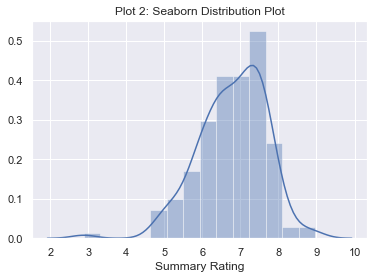

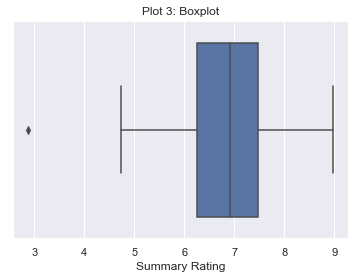

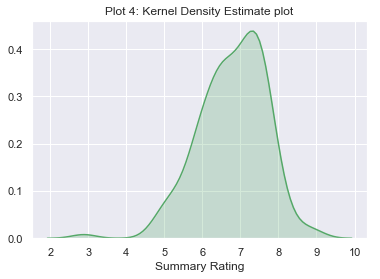

In [4]:
# Choose one variable and plot that variable four different ways.
# Looking at the Overall Score (SUMMARY INDEX)
# 1. Histogram
plt.hist(econ_data['SUMMARY INDEX'], bins=30)
plt.xlabel('Summary Rating')
plt.title('Plot 1: Histogram')
plt.show()

# 2. Distribution plot
sns.set(style="darkgrid")
sns.distplot(econ_data['SUMMARY INDEX'])
plt.xlabel('Summary Rating')
plt.title('Plot 2: Seaborn Distribution Plot')
plt.show()

# 3. Boxplot
sns.boxplot(econ_data['SUMMARY INDEX'])
plt.xlabel('Summary Rating')
plt.title('Plot 3: Boxplot')
plt.show()

# 4. KDE
sns.distplot(econ_data['SUMMARY INDEX'], hist=False, color="g", kde_kws={"shade": True})
plt.xlabel('Summary Rating')
plt.title('Plot 4: Kernel Density Estimate plot')
plt.show()

For this variable, these plots illustrate very similar results.  The boxplot is most effective at showing the outlier data point.  They all show that the bulk of data shows something very close to a normal distribution.  The histogram with added bins shows that the higher data points are also possible outliers because it illustrates gaps in the curve.

In [5]:
# Choose two continuous variables, and plot them three different ways.
# Consider the relationship of labor market regulations and starting a business
d1 = econ_data['Labor market regulations']
d2 = econ_data['Starting a  business']

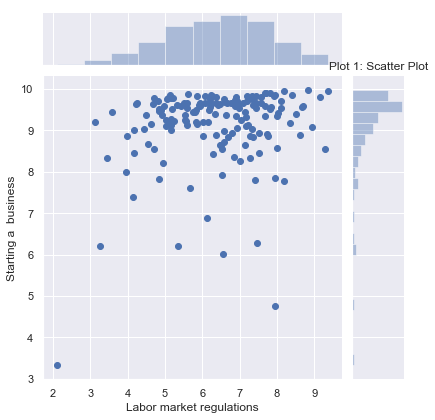

In [6]:
sns.jointplot(x='Labor market regulations', y='Starting a  business', data=econ_data)
plt.title('Plot 1: Scatter Plot')
plt.show()

The data is largely grouped in one area.  There are several outliers with 1, possibly 2, of them creating a signficant skew to the overall data.

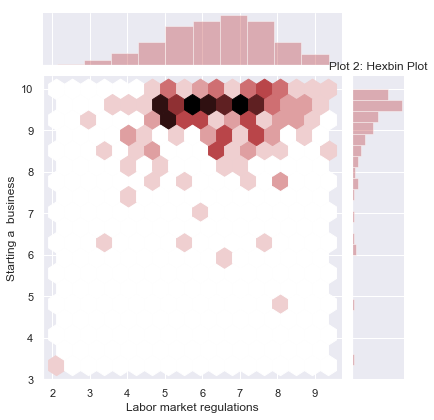

In [7]:
sns.jointplot(x=d1, y=d2, kind="hex", color="r")
plt.title('Plot 2: Hexbin Plot')
plt.show()

This is very informative as it shows the concentration of related data points in tight conformity for starting a business and much more divergent for labor market relations.

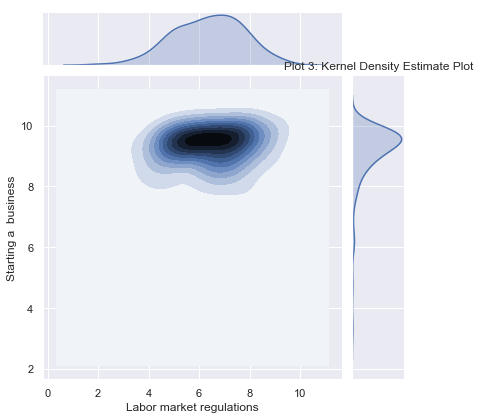

In [8]:
sns.jointplot(x='Labor market regulations', y='Starting a  business', data=econ_data, kind="kde")
plt.title('Plot 3: Kernel Density Estimate Plot')
plt.show()

This one is not as helpful for evaluating outliers however it does show that there is a strong correlation in these variables.

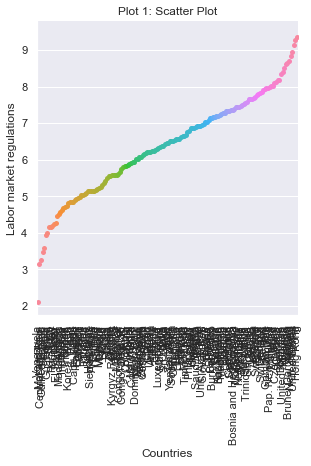

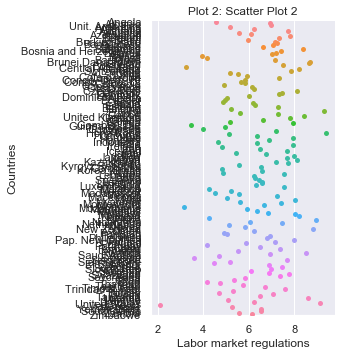

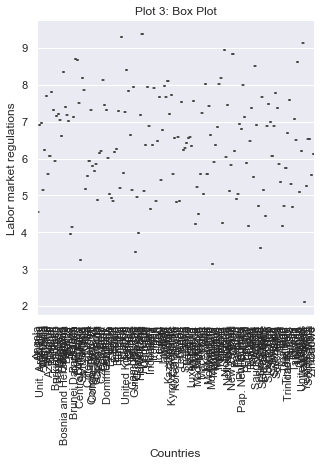

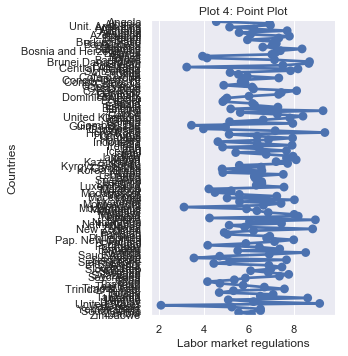

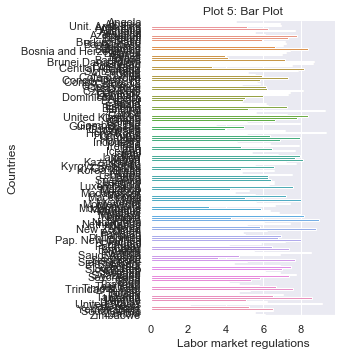

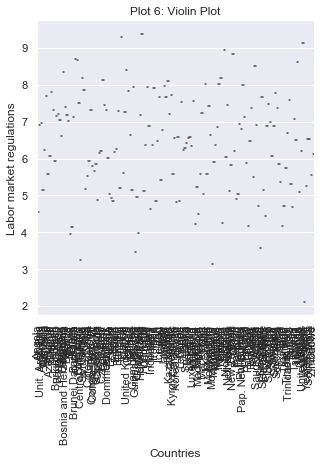

In [9]:
# Choose one continuous variable and one categorical variable, and plot them six different ways.
sns.catplot(x='Countries', y='Labor market regulations', data=econ_data.sort_values('Labor market regulations'))
plt.xticks(rotation=90)
plt.title('Plot 1: Scatter Plot')
plt.show()

sns.catplot(x='Labor market regulations', y='Countries', kind="swarm", data=econ_data)
plt.title('Plot 2: Scatter Plot 2')
plt.show()

sns.catplot(x='Countries', y='Labor market regulations', kind="box", dodge=False,
                data=econ_data)
plt.xticks(rotation=90)
plt.title('Plot 3: Box Plot')
plt.show()

sns.catplot(x='Labor market regulations', y='Countries', kind="point", data=econ_data)
plt.title('Plot 4: Point Plot')
plt.show()

sns.catplot(x='Labor market regulations', y='Countries', kind="bar", data=econ_data)
plt.title('Plot 5: Bar Plot')
plt.show()

sns.catplot(x='Countries', y='Labor market regulations', kind="violin", data=econ_data)
plt.title('Plot 6: Violin Plot')
plt.xticks(rotation=90)
plt.show()


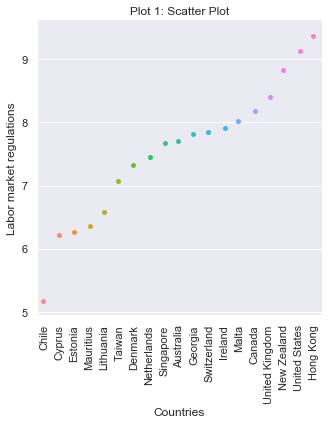

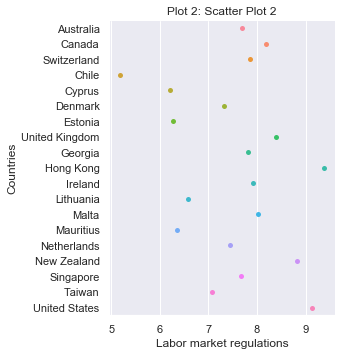

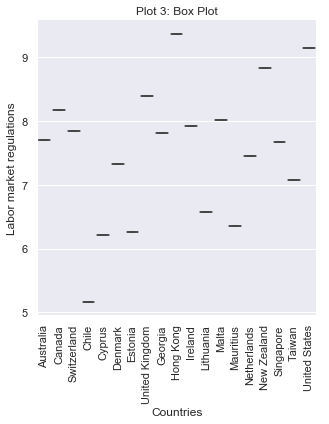

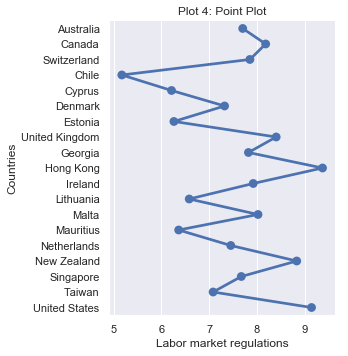

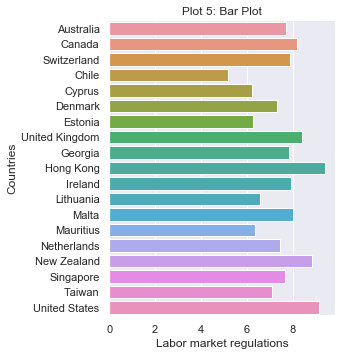

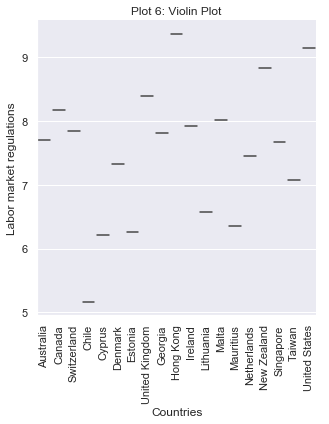

In [10]:
# Choose one continuous variable and one categorical variable, and plot them six different ways.
# Get the top 10% of countries
econ2_data = econ_data[econ_data['SUMMARY INDEX'] > 7.7]
cty = econ2_data['Countries']
d3 = econ2_data['Labor market regulations']

sns.catplot(x='Countries', y='Labor market regulations', data=econ2_data.sort_values('Labor market regulations'))
plt.xticks(rotation=90)
plt.title('Plot 1: Scatter Plot')
plt.show()

sns.catplot(x='Labor market regulations', y='Countries', kind="swarm", data=econ2_data)
plt.title('Plot 2: Scatter Plot 2')
plt.show()

sns.catplot(x='Countries', y='Labor market regulations', kind="box", dodge=False,
                data=econ2_data)
plt.xticks(rotation=90)
plt.title('Plot 3: Box Plot')
plt.show()

sns.catplot(x='Labor market regulations', y='Countries', kind="point", data=econ2_data)
plt.title('Plot 4: Point Plot')
plt.show()

sns.catplot(x='Labor market regulations', y='Countries', kind="bar", data=econ2_data)
plt.title('Plot 5: Bar Plot')
plt.show()

sns.catplot(x='Countries', y='Labor market regulations', kind="violin", data=econ2_data)
plt.title('Plot 6: Violin Plot')
plt.xticks(rotation=90)
plt.show()

Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
Probability distributions
Bivariate relationships
Whether the distributions or the relationships vary across groups
Accompany your plot with a written description of what you see.

c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\charlotte\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


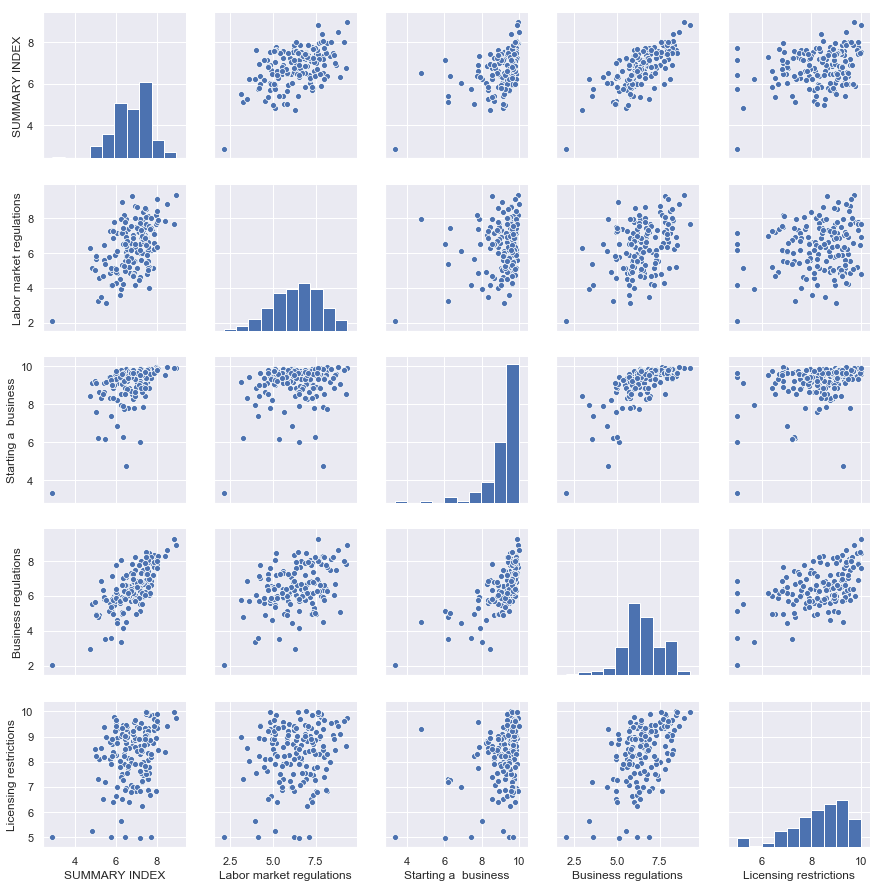

In [11]:
econ_sub = econ_data[['Countries', 'SUMMARY INDEX','Labor market regulations','Starting a  business','Business regulations','Licensing restrictions']].copy()
sns.pairplot(data=econ_sub, diag_kind='hist')
plt.show()

The histograms show that the variables have very different distributions.  Each of the grids illustrate very well whether there is any similarities in values across categories.  Of most interest is the top tier which shows each detail category in relation to the summary rating.  The skew to the right for the Starting a Business factor implies that regulations to start a business are fairly tightly clustered among countries and don't have as much influence to the overall rating as Licensing restrictions which are scattered across the grid.

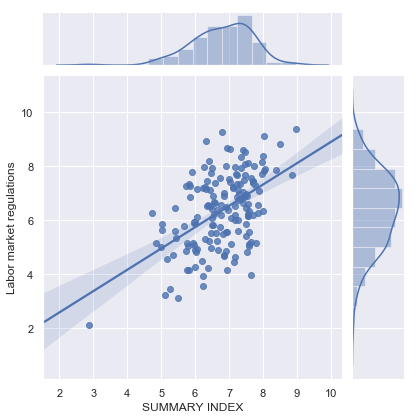

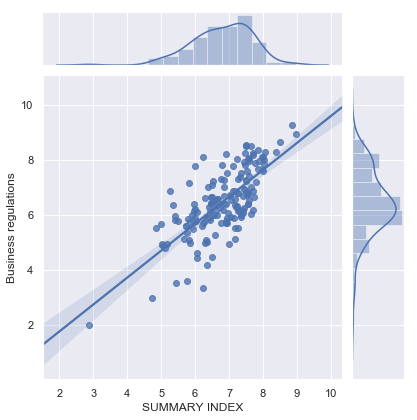

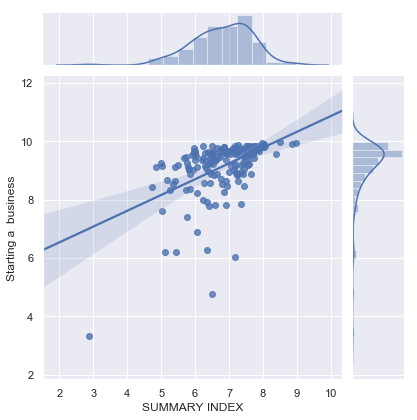

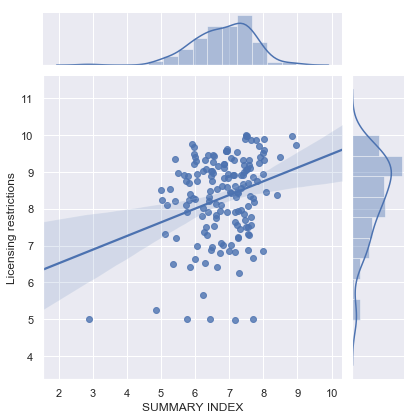

In [12]:
sns.jointplot('SUMMARY INDEX', 'Labor market regulations', data=econ_sub, kind='reg')
sns.jointplot('SUMMARY INDEX', 'Business regulations', data=econ_sub, kind='reg')
sns.jointplot('SUMMARY INDEX', 'Starting a  business', data=econ_sub, kind='reg')
sns.jointplot('SUMMARY INDEX', 'Licensing restrictions', data=econ_sub, kind='reg')
plt.show()

This was outside the exercise but was curious what regression might uncover. 